In [ ]:
################################ RF without any resampling techniques ################################

In [ ]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')


In [2]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())


Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))


Original dataset shape Counter({0: 23364, 1: 6636})


In [ ]:
################# Without any resampling technique #################

In [ ]:
#### Nested K-fold cross-validation without any resampling technique ####

In [8]:
# Automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels = cross_val_predict(search, input_cols, target_col, cv=cv_outer, n_jobs=-1)

# Generate the classification report
report = classification_report(target_col, predicted_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8396    0.9407    0.8873     23364
           1     0.6375    0.3672    0.4660      6636

    accuracy                         0.8138     30000
   macro avg     0.7385    0.6540    0.6766     30000
weighted avg     0.7949    0.8138    0.7941     30000



In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate recall, accuracy, and precision on the test set
recall = recall_score(target_col, predicted_labels)
print("Recall:", "{:.4f}".format(recall))

accuracy = accuracy_score(target_col, predicted_labels)
print("Accuracy:", "{:.4f}".format(accuracy))

precision = precision_score(target_col, predicted_labels)
print("Precision:", "{:.4f}".format(precision))

f1 = f1_score(target_col, predicted_labels)
print("F1 Score:", "{:.4f}".format(f1))

Recall: 0.3672
Accuracy: 0.8138
Precision: 0.6375
F1 Score: 0.4660


In [46]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_col, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21978  1386]
 [ 4199  2437]]


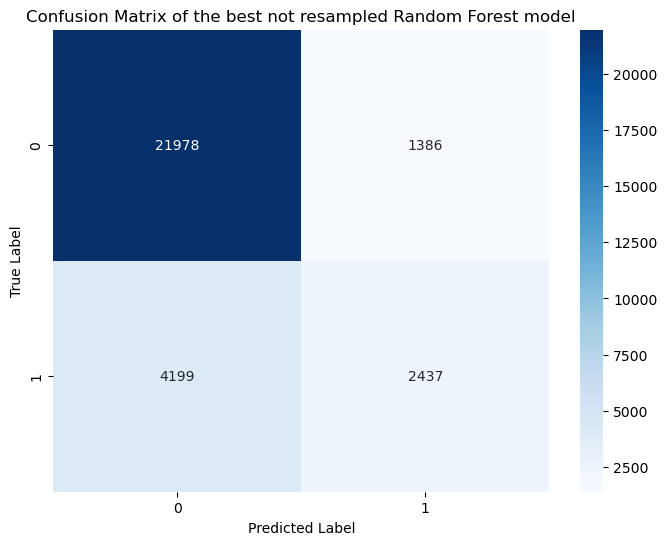

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best not resampled Random Forest model")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col, predicted_labels)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")


Best Hyperparameters: {'max_features': 10, 'n_estimators': 50}


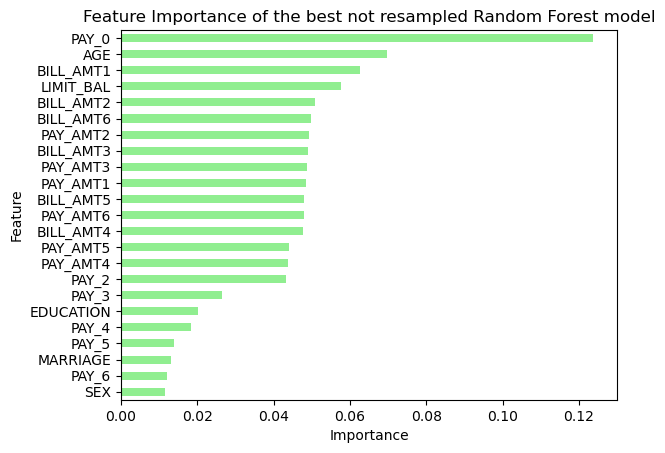

In [48]:
# Best hyperparameters and feature importance
import matplotlib.pyplot as plt
import pandas as pd
search.fit(input_cols, target_col)

# Access the best hyperparameters
best_params = search.best_params_
print("Best Hyperparameters:", best_params)

importances = pd.Series(data=search.best_estimator_.feature_importances_, index=input_cols.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance of the best not resampled Random Forest model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
#### Normal Random Forest without any resampling technique ####

In [9]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_cols, target_col, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_valid.shape)
print(y_train.shape)
print(y_test.shape)

(18000, 23)
(6000, 23)
(6000, 23)
(6000,)
(18000,)
(6000,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = rf.predict(X_valid)

# Calculate the F1 score and classification report
rf_f1 = f1_score(y_valid, y_pred)
print("F1 Score:", "{:.4f}".format(rf_f1))
print(classification_report(y_valid, y_pred))

F1 Score: 0.4635
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.66      0.36      0.46      1316

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Text(0.5, 1.0, 'Features Importances')

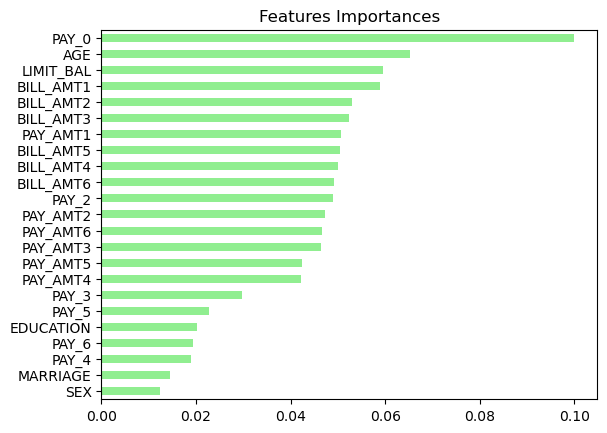

In [16]:
#Feature importance
import matplotlib.pyplot as plt
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')

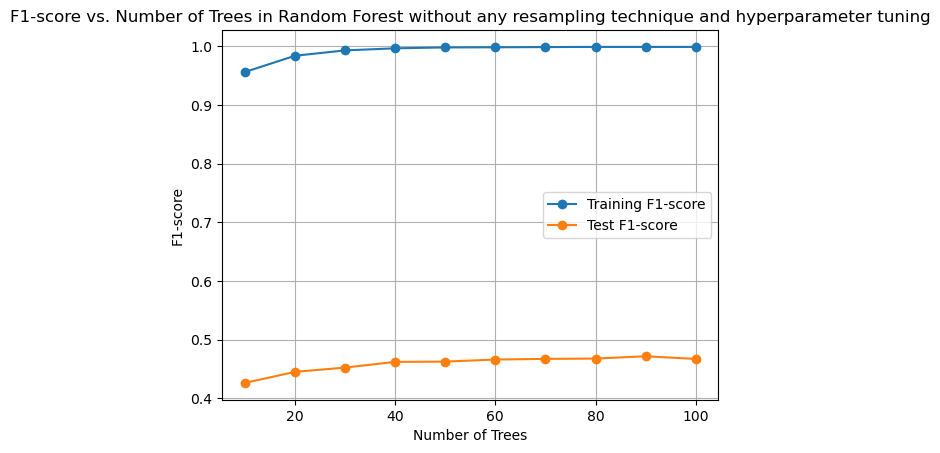

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define a range of values for the number of trees
num_trees_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store F1-scores for training and validation sets
train_f1_scores = []
test_f1_scores = []

# Train RandomForestClassifier models with different numbers of trees
for num_trees in num_trees_range:
    # Create and train the model
    rf = RandomForestClassifier(n_estimators=num_trees, random_state=0)
    rf.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    # Calculate F1-scores for training and validation sets
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Append F1-scores to the lists
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot the F1-scores for training and validation sets against the number of trees
plt.plot(num_trees_range, train_f1_scores, label='Training F1-score', marker='o')
plt.plot(num_trees_range, test_f1_scores, label='Test F1-score', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Trees in Random Forest without any resampling technique and hyperparameter tuning')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Predict labels on the test set
y_pred_test = rf.predict(X_test)

# Calculate the F1 score on the test set
rf_f1_test = f1_score(y_test, y_pred_test)
print("F1 Score on Test Set:", "{:.4f}".format(rf_f1_test))

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

F1 Score on Test Set: 0.4671
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
#### Bagging without any resampling technique ####

In [29]:
# 10 Bags without any resampling technique
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import f1_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_10 = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)

# Train the BaggingClassifier
bagging_classifier_10.fit(X_train, y_train)

# Predict using the BaggingClassifier
y_pred_10 = bagging_classifier_10.predict(X_valid)

# Calculate the f1-score and print classification report
bagging_f1_10 = f1_score(y_valid, y_pred_10)
print("F1 Score:", "{:.4f}".format(bagging_f1_10))

print("Classification Report:")
print(classification_report(y_valid, y_pred_10))

F1 Score: 0.4687
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.68      0.36      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [30]:
# Predict using the BaggingClassifier on the test set
y_pred_10_test = bagging_classifier_10.predict(X_test)

# Calculate the F1-score and print classification report for the test set
bagging_f1_10_test = f1_score(y_test, y_pred_10_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_10_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_10_test))

F1 Score: 0.4727
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [31]:
# 100 Bags without any resampling technique
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_100 = BaggingClassifier(base_classifier, n_estimators=100, random_state=0)

# Train the BaggingClassifier
bagging_classifier_100.fit(X_train, y_train)

# Predict using the BaggingClassifier
y_pred_100 = bagging_classifier_100.predict(X_valid)

# Calculate the f1-score and print classification report
bagging_f1_100 = f1_score(y_valid, y_pred_100)
print("F1 Score:", "{:.4f}".format(bagging_f1_100))

print("Classification Report:")
print(classification_report(y_valid, y_pred_100))

F1 Score: 0.4685
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.68      0.36      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [32]:
# Predict using the BaggingClassifier on the test set
y_pred_100_test = bagging_classifier_100.predict(X_test)

# Calculate the F1-score and print classification report for the test set
bagging_f1_100_test = f1_score(y_test, y_pred_100_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_100_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_100_test))

F1 Score: 0.4731
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [33]:
# 25 Bags without any resampling technique
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (Random Forest in this case)
base_classifier = RandomForestClassifier(random_state=0)

# Create a BaggingClassifier
bagging_classifier_25 = BaggingClassifier(base_classifier, n_estimators=25, random_state=0)

# Train the BaggingClassifier
bagging_classifier_25.fit(X_train, y_train)

# Predict using the BaggingClassifier
y_pred_25 = bagging_classifier_25.predict(X_valid)

# Calculate the f1-score and print classification report
bagging_f1_25 = f1_score(y_valid, y_pred_25)
print("F1 Score:", "{:.4f}".format(bagging_f1_25))

print("Classification Report:")
print(classification_report(y_valid, y_pred_25))

F1 Score: 0.4685
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.36      0.47      1316

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [34]:
# Predict using the BaggingClassifier on the test set
y_pred_25_test = bagging_classifier_25.predict(X_test)

# Calculate the F1-score and print classification report for the test set
bagging_f1_25_test = f1_score(y_test, y_pred_25_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_25_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_25_test))

F1 Score: 0.4698
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [35]:
# 50 Bags without any resampling technique
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (Random Forest in this case)
base_classifier = RandomForestClassifier(random_state=0)

# Create a BaggingClassifier
bagging_classifier_50 = BaggingClassifier(base_classifier, n_estimators=50, random_state=0)

# Train the BaggingClassifier
bagging_classifier_50.fit(X_train, y_train)

# Predict using the BaggingClassifier
y_pred_50 = bagging_classifier_50.predict(X_valid)

# Calculate the f1-score and print classification report
bagging_f1_50 = f1_score(y_valid, y_pred_50)
print("F1 Score:", "{:.4f}".format(bagging_f1_50))

print("Classification Report:")
print(classification_report(y_valid, y_pred_50))

F1 Score: 0.4645
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4684
           1       0.67      0.36      0.46      1316

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [36]:
# Predict using the BaggingClassifier on the test set
y_pred_50_test = bagging_classifier_50.predict(X_test)

# Calculate the F1-score and print classification report for the test set
bagging_f1_50_test = f1_score(y_test, y_pred_50_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_50_test))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_50_test))

F1 Score: 0.4726
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

